In [34]:
import numpy as np
import os #???
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

Very important: make sure to know the shapes of all related quantities. There are several matrix operations (vectorizations) in the following. These cannot be done if the shapes of those quantities are not compatible.  
Special attention should be paid to np.dot. When taking the dot product between a 2D array and a 1D array, the result is a 1D array. However, if taking the dot product between a 2D array and a column vector, the result is a column vector.

In [35]:
class AdalineGD:
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        # Initialize parameters
        
        # Learning rate
        self.eta = eta
        # Number of iterations during training. Also seems to be called number of epochs.
        self.n_iter = n_iter
        # random_state: used to initialize a random number generator. 
        # The weights and bias will be randomly initialized, and this requires a random number generator.
        self.random_state = random_state
        
    def fit(self, X, y):
        # Fit the model to data (adjusting weights and bias)
        
        # Random generator
        # Initialize the generator.
        # self.random_state is a seed. rgen is a pseudo-random number generator. If the seed does not change, the result won't change either.
        rgen = np.random.RandomState(self.random_state) 
        # randomly generate weights from a normal distribution
        # loc: mean
        # scale: standard deviation
        # size: if it is a number, then return a random number. If it is a tuple, e.g. (2,3), then return an array.
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        # Note that X.shape[1] is the number of features. The number of weights is equal to the number of features
        # Since X.shape[1] is a scalar, self.w_ is a 1D array.
        
        
        # Initialize the bias as zero.
        # np.float_ is the float type in numpy
        # Just ignore the difference between np.float and the float type in python at the moment.
        self.b_ = np.float_(0.)
        # Values of the loss function during iteration
        self.losses_ = []
        
        n = X.shape[0] # Number of training examples
        
        for _ in range(self.n_iter):
            z = self.net_input(X) # Calculate z for all training examples at the same time
            error = self.activation(z)-y
            pLpw = np.dot(error, X) / n
            pLpb = np.mean(error)
            self.w_ -= self.eta * pLpw
            self.b_ -= self.eta * pLpb
            loss = (error**2).mean() / 2
            self.losses_.append(loss)
        
        return self
    
    def net_input(self, X):
        # We need to calculate z = w.x+b for each example
        # But this can be done for all examples simultaneously.
        # Note that self.w_ is a 1D array. np.dot(X, self.w_) gives a 1D array, not a column vector
        # If self.w_ is a column vector, np.dot(X,self.w_) is also a column vector
        # Thus, this function returns a 1D array, containing net inputs for all training examples.
        return np.dot(X, self.w_) + self.b_
    
    def activation(self, z):
        # The sigma function in the book
        # Here, sigma(z)=z
        return z
    
    def predict(self, X):
        return np.where(self.net_input(X)>=0.5, 1, 0)
        # np.where: if the condition is true, return the first value, otherwise the second.
        # the condition self.net_input(X)>=0.5 is actually a 1D array, so the output is also a 1D array
        # The output of np.where has the same shape as the condition
    

In [36]:
# Loading data
# Data source
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

# Read data directly from the URL
df = pd.read_csv(s, header=None, encoding='utf-8')
# I have also downloaded the data. So the following code also works.
# df = pd.read_csv('./data/iris.data')

# Print the last 5 rows
df.tail()


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


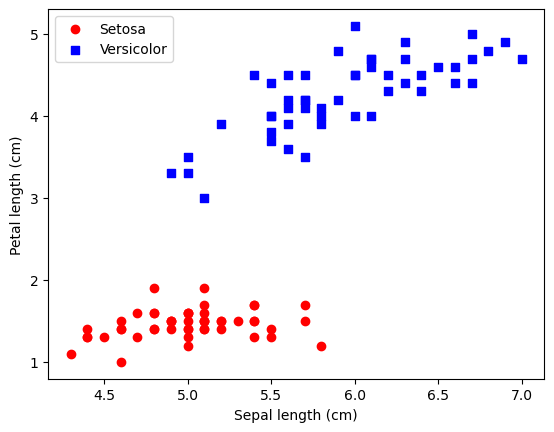

In [37]:
# Create labels
# 'Iris-setosa' --> 0   'Iris-virginica' --> 1
y = df.iloc[0:100, 4].values   
y = np.where(y == 'Iris-setosa', 0, 1)
# Get two features
X = df.iloc[0:100, [0,2]].values
# Plot data
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(X[:50,0], X[:50,1], color='red', marker='o', label='Setosa')
ax.scatter(X[50:100,0], X[50:100,1], color='blue', marker='s', label='Versicolor')
ax.set_xlabel('Sepal length (cm)')
ax.set_ylabel('Petal length (cm)')
ax.legend(loc='upper left')

Text(0, 0.5, 'log(loss)')

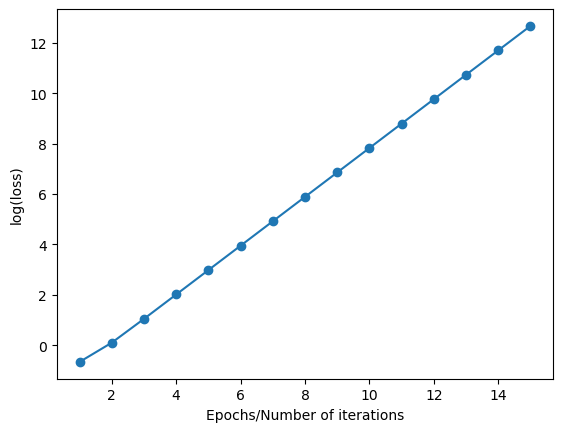

In [38]:
# Train Adaline
ada1 = AdalineGD(eta=0.1, n_iter=15, random_state=1)
ada1.fit(X,y)
# Plot misclassification
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(range(1, len(ada1.losses_)+1), np.log10(ada1.losses_), marker='o')
ax.set_xlabel('Epochs/Number of iterations')
ax.set_ylabel('log(loss)')
# Note that the figure may not be the same as the one in the book.
# If we change the value of 'random_state', then we may get the figure in the book.

Text(0, 0.5, 'log(loss)')

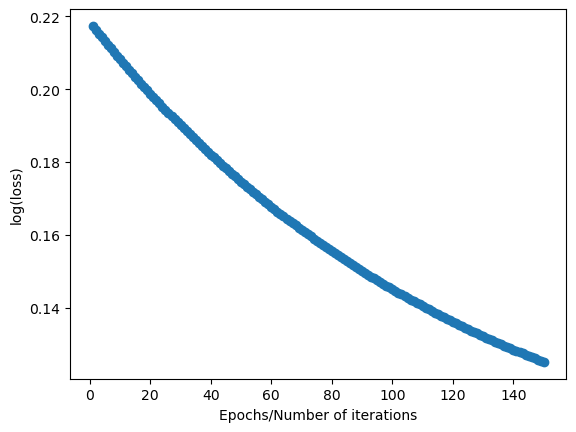

In [39]:
# Train Adaline, with a smaller learning rate
ada2 = AdalineGD(eta=0.0001, n_iter=150, random_state=1)
ada2.fit(X,y)
# Plot misclassification
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(range(1, len(ada2.losses_)+1), (ada2.losses_), marker='o')
ax.set_xlabel('Epochs/Number of iterations')
ax.set_ylabel('log(loss)')
# Note that the figure may not be the same as the one in the book.
# If we change the value of 'random_state', then we may get the figure in the book.

Text(0, 0.5, 'log(loss)')

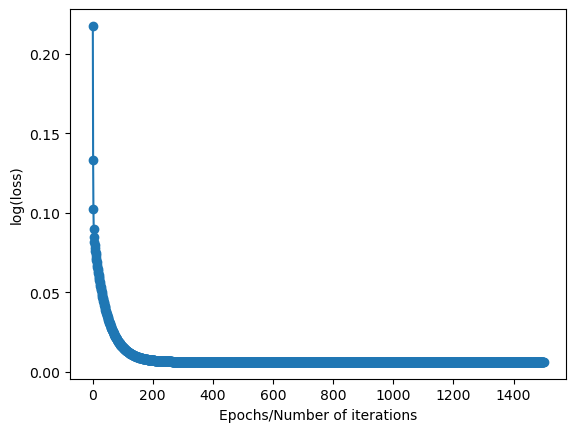

In [40]:
# Train Adaline, with a smaller learning rate
ada2 = AdalineGD(eta=0.01, n_iter=1500, random_state=1)
ada2.fit(X,y)
# Plot misclassification
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(range(1, len(ada2.losses_)+1), (ada2.losses_), marker='o')
ax.set_xlabel('Epochs/Number of iterations')
ax.set_ylabel('log(loss)')
# Note that the figure may not be the same as the one in the book.
# If we change the value of 'random_state', then we may get the figure in the book.

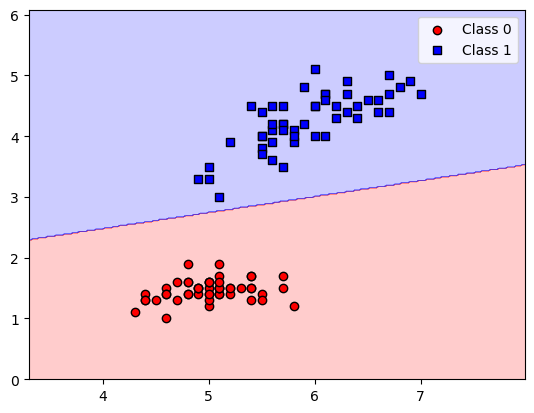

In [41]:
# Visualizing the decision boundary
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # Create lists of markers and colors
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    
    # np.unique: find the unique elements of an array
    # The output y only has two possible values, 0 and 1. Therefore np.unique(y) is 2.
    # Then colors[:len(np.unique(y))] is colors[:2], i.e., colors = ('red', 'blue')
    # This is suitable for discrete colors.
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # Set the range 
    # The range of the figure is larger than the range of the features.
    # Prevent data points from lying on the edges of the figure.
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1 
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1 
    # Generate meshgrid
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    # np.ravel(): flatten an array. It returns a 1D-array
    # The input of the function 'predict' is X. Each column of X corresponds to a feature.
    # Therefore, after raveling, we need to transpose the array.
    # lab: labels for all grid points
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # The output of 'predict' is a 1D-array. It is reshaped to have the same shape as xx1
    lab = lab.reshape(xx1.shape)
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    # alpha: control the transparency
    ax.contourf(xx1, xx2, lab, alpha=0.2, cmap=cmap)
    
    # Plot training examples
    # enumerate: 
    for idx, cl in enumerate(np.unique(y)):
        ax.scatter(x=X[y==cl,0], y=X[y==cl,1], alpha=1, c=colors[idx], marker=markers[idx], label='Class {}'.format(cl), edgecolor="black")
    ax.legend()
    
plot_decision_regions(X, y, ada2)

In [42]:
# Feature scaling
X_std = np.copy(X)
mu = np.mean(X, axis=0)
std = np.std(X, axis=0)
X_std = (X - mu)/std

Text(0, 0.5, 'log(loss)')

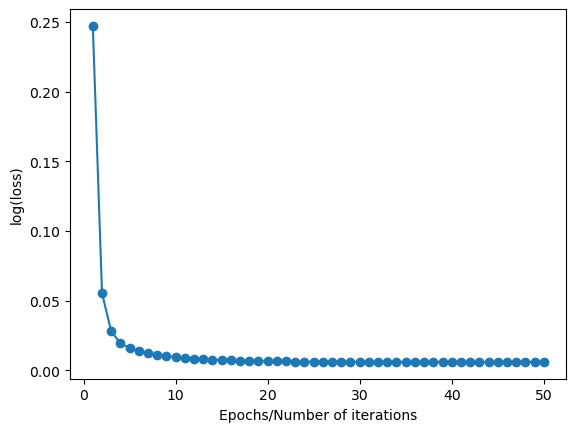

In [43]:
ada_gd_fs = AdalineGD(n_iter=50, eta=0.5)
ada_gd_fs.fit(X_std, y)
# Plot misclassification
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
#ax.plot(range(1, len(ada_gd_fs.losses_)+1), np.log10(ada_gd_fs.losses_), marker='o')
ax.plot(range(1, len(ada_gd_fs.losses_)+1), (ada_gd_fs.losses_), marker='o')
ax.set_xlabel('Epochs/Number of iterations')
ax.set_ylabel('log(loss)')

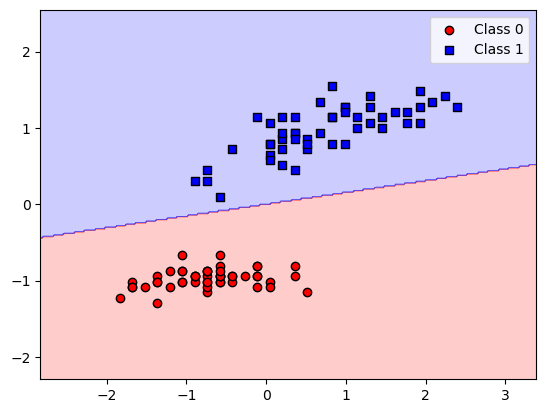

In [44]:
plot_decision_regions(X_std, y, ada_gd_fs, resolution=0.02)

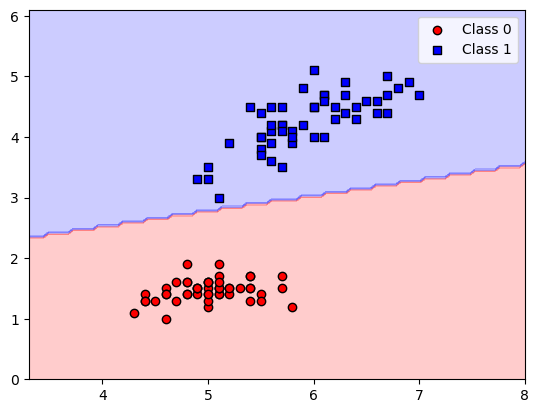

In [45]:
# Visualizing the decision boundary with feature scaling
def plot_decision_regions_fs(X_std, X, y, classifier, resolution2=101):
    # Create lists of markers and colors
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    
    # np.unique: find the unique elements of an array
    # The output y only has two possible values, 0 and 1. Therefore np.unique(y) is 2.
    # Then colors[:len(np.unique(y))] is colors[:2], i.e., colors = ('red', 'blue')
    # This is suitable for discrete colors.
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # Set the range 
    # The range of the figure is larger than the range of the features.
    # Prevent data points from lying on the edges of the figure.
    # The prediction should be made with normalized data, thus X_std is used.
    x1_min, x1_max = X_std[:,0].min() - 1, X_std[:,0].max() + 1 
    x2_min, x2_max = X_std[:,1].min() - 1, X_std[:,1].max() + 1 
    # Generate meshgrid
    # linspace is used instead of arange. We need to keep the shape of 'lab' the same as xx1 and xx2 generated by the original data X
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, resolution2), np.linspace(x2_min, x2_max, resolution2))
    # np.ravel(): flatten an array. It returns a 1D-array
    # The input of the function 'predict' is X. Each column of X corresponds to a feature.
    # Therefore, after raveling, we need to transpose the array.
    # lab: labels for all grid points
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # The output of 'predict' is a 1D-array. It is reshaped to have the same shape as xx1
    lab = lab.reshape(xx1.shape)
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    
    # To plot the original data range, X is used.
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1 
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1 
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, resolution2), np.linspace(x2_min, x2_max, resolution2))
    # alpha: control the transparency
    ax.contourf(xx1, xx2, lab, alpha=0.2, cmap=cmap)
    
    # Plot training examples
    # enumerate: 
    for idx, cl in enumerate(np.unique(y)):
        ax.scatter(x=X[y==cl,0], y=X[y==cl,1], alpha=1, c=colors[idx], marker=markers[idx], label='Class {}'.format(cl), edgecolor="black")
    ax.legend()
    
plot_decision_regions_fs(X_std, X, y, ada_gd_fs)